# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: RNNs

Note 1: You can either work on HPC (recommended) or Google Colab for this homework.

Note 2: If you need to write mathematical terms, you can type your answers in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload your final jupyter notebook file, along with any figures that you may produce, in a zipped file named **netid_hw3** on Brightspace.

**Submission deadline: Thursday April 13th 2023 11:59pm.**



# Question 1: Literature Review: LSTM for ECG Signal Classification (Total points 20 + 5 bonus points)

Read this paper:

#### Yildirim, Özal. "A novel wavelet sequence based on deep bidirectional LSTM network model for ECG signal classification." Computers in biology and medicine 96 (2018): 189-202.

https://www.sciencedirect.com/science/article/pii/S0010482518300738?casa_token=XhS9KHU_fQoAAAAA:FGE7jkAK3I7HRf1yZNl8LA2snhUo1VgyEYdL7oXP1aI3jkBoqEc3dnvGtw1FEuNzWhnlAZ5X

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section Materials and Method. You can find the two proposed Deep Learning architectures in the paper. Please briefly describe the model structure of one of the model, DULSTM-WS. What are the layers, number of features input to the network and the output dimension of the model? You can ignore specifics parameters for the layers.

**Ans.**

The DULSTM-WS model first transform ECG signals to wavelet sequences, followed by two unidirectional LSTM layers, a dropout layer, a flatten layer, and two dense (fully connected) layers.

The input data dimension **for training is 4425 × 360 and 1475 × 360 for testing stage**.

- Wavelet Sequence (WS) layer. Output will be n dimension from 2^n input dimension
- unidirectional LSTM layer with 64 dimension and a dropout rate of 0.1
- unidirectional LSTM with 32 dimension
- Feed forward layer with 128 units output with dropout=0.2 and ReLU activation
- Last Feed forward layer with softmax activation and a output **dimension of 5**, which represents 5 classes of arrhythmia heartbeat types


**1.2) (5 points)** What is the loss function for the two proposed models (same for both)? What are the evaluation criteria used by the authors for the models?

**Ans.**

Cross-entropy with Adam optimizer were used. The used confusion matrices and accuracy for evaluation

**1.3) (5 points)** The Wavelet Sequences (WS) layer serves as a data transformation for the input ECG sequence. Please briefly describe the details functionality of the layer. Please also describe conceptually the effect of number of layers for WS layer on the signal **(Hint: check the included figures in section 4)**.

**Ans.**

WS layer is a type of data transformation layer used for processing input ECG (electrocardiogram) sequences. The WS layer decomposes the input signal into multiple frequency sub-bands using wavelet analysis. This process creates a new representation of the signal that can capture informations in the input signal.

According to the visualization in fig.9, the layers take different levels of information so bands with different signal strength could be capture.



**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used but wasn't? Briefly provide some explanation of your choice.

**Ans.**

The author mentioned augmentation process in WS layer. But didn't specify the details. They also performed dropout techniques in both LSTM layers and feed forward network. They may add noises for the ECG waves as augmentation, and do L2 or L1 regularization, and do batch normalization.

**1.5) (Bonus, maximum 5 points)**. What other architectures would you try? For maximum point, name one architecture, briefly explain your motivation for it and in a few sentences explain why the proposed changes might work better. Do some literature review on the application of such architecture in the medical field.

**Ans.**

Since the input ECG can be viewed as a image, I would like to try CNN-based models. Specifically, from paper "A Study on Arrhythmia via ECG Signal Classification Using the Convolutional Neural Network"(https://doi.org/10.3389/fncom.2020.564015), they used a simple CNN structure with 4 convoluation layers and kernel size of 13, 15, 17, 19 and 2 FC layer for similar classification problem. 

In addition, Since RNN is basically a more constrained type of transformer, it would be worth trying a transformer-based models for the same problem.

# Question 2: Literature Review: Multi-Channel Fusion LSTM (20 points)

Read this paper: 


#### Liu, S., Wang, X., Xiang, Y., Xu, H., Wang, H., & Tang, B. (2022). Multi-channel Fusion LSTM for Medical Event Prediction using HERs. 

https://www.sciencedirect.com/science/article/pii/S1532046422000272?casa_token=ymhReMXUX2kAAAAA:pVqghdvoabg5Rkz4IKInVLeiMQNfc3nHc9Y71voIvdD7Ba3yfWOY5ME9Yx97mICi04IREy5b

In this paper, the authors propose two models with multi-channel fusion of LSTM to handle heterogeneous electronic medical records. We are interested in understanding how different channels of input signals are processed and embedded with LSTM modules, and subsequently used for downstream tasks.


**2.1) (10 points)** After reading the paper, focus on Secion 3.2. Describe, with relevant formulas, how the fusion module works for an individual auxillary channel for Single-Belt Fusion model and Multi-Belt Fusion model. Please also conceptually describe the difference of the fusion modules in the two models.

**Ans.**

For the Single-Belt Fusion model, primary and auxiliary channels share the same LSTM unit for information fusion (see Fig. 3 from the paper). The fusion module selects information from each auxiliary channel and integrates it into the history information of the primary channel. 

The Multi-Belt Fusion model is more complex. Each auxiliary channel has its own fusion module. The fusion module works by first individually fusing each auxiliary channel with the primary channel using a gated network on their own belt and then combining the fused channels with the primary channel using a multi-layer perceptron. 

The main difference between the two models is in how they fuse channel information. In Single-Belt Fusion model, all channels share one LSTM unit. In Multi-Belt Fusion model, each auxiliary channel has its own LSTM unit. 

**2.2) (5 points)** Consider the Single-Belt Fusion model. Briefly describe the model structure. Consider that the model is used for a prediction downstream task. Please also describe how the SBF embedding is used for the prediction task, along with the loss function used in the study **(hint: check Section 3.3)**.

**Ans.**

The Single-Belt Fusion model contains an input layer, an embedding layer, an LSTM layer, a fusion layer, and a prediction layer.

They do medical event prediction by connecting the SBF embedding with a fully connected layer with sigmoid activation function to predict event occurence of next time point.

The cross entropy is used as the loss function in the study.


**2.3) (5 points)** The authors experimented the model using two datasets. Which criteria are used to evaluate the models? What is the best model according to the evaluation criteria?

**Ans.** 

They mainly use AUC(receiver operating characteristic curve) and AUPR (area under the precision-recall curve) as criteria. They also showed the top-k recalls where k is set to 10, 20, 30, 40 and 50 on medication prediction task in both datasets. MCF-LSTM-MBF has the greatest performance regarding the AUC, AUPR, and top k recalls in Medication prediction, Diagnosis prediction, Labtest prediction and in both data sets.

# Question 3 - Programming: Build Classifiers on Medical Transcriptions - Recurrent Neural Networks and Self Attention(60 points + 10 bonus points)

Let's build some models now. In this homework, we will focus on a dataset which has around 5000 medical transcriptions and the corresponding medical specialty. The data is available <a href="https://www.kaggle.com/tboyle10/medicaltranscriptions">here</a>.

Here, we will focus on predicting top few classes of medical specialty, from the transcription text. <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2023/tree/main/lab6">Lab 6</a> will be very useful here.

**If you are working on Google Colab, please change the working directory path and run the next cell.**

In [ ]:
# Run this cell if you are working on Google Colab
from google.colab import drive
import os
drive.mount('/content/drive')

path = 'Colab Notebooks/'  # Change this to your drive directory
os.chdir(os.path.join('drive/MyDrive', path))

Mounted at /content/drive


**3.1) (5 points)** Read the csv using Pandas. Select the top 6 frequent classes ('medical_specialty') from the data. Only keep the rows that belong to one of these classes in your data. Which classes are there, and how many rows do you have after this filteration?

**Ans.**

The top 6 frequent classes from first to sixth are Surgery, Consult - History and Phy., Cardiovascular / Pulmonary,Orthopedic,Radiology, General Medicine. The number of filtered raws are 2878.

In [ ]:
import pandas as pd
raw = pd.read_csv('data/mtsamples.csv')
print('Size of raw data: %s'%str(raw.shape))
top6 = raw.medical_specialty.value_counts().index[:6].tolist()
df = raw.loc[raw["medical_specialty"].isin(top6)].reset_index(drop=True)
print('Size of filtered data: %s'%str(df.shape))
print(df['medical_specialty'].value_counts() )
lbl_encode = pd.factorize(df['medical_specialty'])
display(list((i,x)  for i,x in enumerate(lbl_encode[1]) ) )
df['medical_specialty']= lbl_encode[0]   # label encoding
df.drop(['Unnamed: 0'], inplace=True, axis=1)

Size of raw data: (4999, 6)
Size of filtered data: (2878, 6)
 Surgery                       1103
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     372
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
Name: medical_specialty, dtype: int64


[(0, ' Cardiovascular / Pulmonary'),
 (1, ' General Medicine'),
 (2, ' Surgery'),
 (3, ' Radiology'),
 (4, ' Orthopedic'),
 (5, ' Consult - History and Phy.')]

**3.2) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:70%, valid:15%, test:15%). Set the random seed to 2023. Please follow the steps from https://pytorch.org/docs/stable/notes/randomness.html to set all the seeds to make the results reproducible.

In [ ]:
import torch
import random
import numpy as np
def setup_seed(seed): 
    torch.use_deterministic_algorithms(True)
    torch.manual_seed(seed) 
    torch.cuda.manual_seed_all(seed) 
    np.random.seed(seed) 
    random.seed(seed) 
    torch.backends.cudnn.deterministic = True
    return None

In [ ]:
idx = np.arange(len(df))
np.random.seed(2023)        # already set by setup_seed function
np.random.shuffle(idx)    # shuffle idx
fifteen = int(len(idx) * 0.15 )
idxs = np.split(idx, (fifteen, fifteen+fifteen)) # splitted to 15%, 15%, 70%
validation = df.iloc[idxs[0]]
test = df.iloc[idxs[1]]
train = df.iloc[idxs[2]]
print(f"Train set size: {train.shape}\nValidation set size: {validation.shape}\nTest set size: {test.shape}")
# validation.to_pickle("data/validation.pkl")
# test.to_pickle("data/test.pkl")
# train.to_pickle("data/train.pkl")



Train set size: (2016, 5)
Validation set size: (431, 5)
Test set size: (431, 5)


**3.3) (5 points)** Create a function to create vocabulary from the training data. Only use the transcription column for this. Use the tokenization scheme of your choice and create a vocabulary.

In [ ]:
import nltk
nltk.download('punkt')
from collections import Counter   # track freq of each word
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# read saved files:
import pandas as pd
test = pd.read_pickle('data/test.pkl').reset_index(drop=True)
validation = pd.read_pickle('data/validation.pkl').reset_index(drop=True)
train = pd.read_pickle('data/train.pkl').reset_index(drop=True)

In [ ]:
import re
UNK = "<UNK>"
PAD = "<PAD>"
def create_vocab(sentences, min_count=3, max_vocab=None):
    """
    data: input pandas Series made by strings
    min_count: min frequency of a word to be kept
    max_vocab: max vector length
    """
    # preprocessing of strings:
    pattern = re.compile('[^a-z]+') 
    sentences = sentences.str.lower().apply(lambda x: re.sub(pattern,' ', str(x)))
    sentences = sentences.apply(word_tokenize)  # split to list
    # count frequency
    word_count = Counter()
    for sentence in sentences:
        word_count.update(sentence)
    # result with filters
    if max_vocab: word_count = word_count.most_common(max_vocab - 2)
    vocabulary = list(w for w in word_count if word_count[w]>min_count) + [UNK, PAD]
    indices = dict(zip(vocabulary, range(len(vocabulary)) ))   
    return vocabulary, indices

In [ ]:
# get vocab_index:
vocabulary, vocab_index = create_vocab(train['transcription'])
print(len(vocabulary)) # len of word
print(vocabulary[:5])  # examples

9540
['preoperative', 'diagnosis', 'bladder', 'lesions', 'with']


**3.4) (10 points)** Write a dataloader and collate function so that we can begin to train our networks! You can choose to use either the complete transcription text or fix a maximum length of transcription text as input for your model.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
class MyDataset(Dataset):
    def __init__(self, vocab_index, df, label = 'medical_specialty'):
        """
        vocab_index: dict of vocabulary in training set with dummy indices
        df: input data
        label: name of outcome column
        """
        self.vocab_index = vocab_index
        self.df = df
        self.label = label
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, key):
        # preprocessing:
        sentence = self.df.loc[key, 'transcription']
        pattern = re.compile('[^a-z]+') 
        sentence = pattern.sub(' ', str(sentence).lower())
        # turn to index based on vocab_index:
        token_indices = np.array([self.vocab_index[word] if word in self.vocab_index else self.vocab_index['<UNK>'] for word in word_tokenize(sentence)])
        return (torch.tensor(token_indices) , self.df.loc[key, self.label])
def pad_collate(batch):
    (xx, yy) = zip(*batch) # * will separate arguments to tuples
    x_lens = [len(x) for x in xx]
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=9540-1) 
    # > 9540 = len(vocabulary) in training
    # padding value == index of <PAD>
    return torch.as_tensor(xx_pad), torch.as_tensor(x_lens), torch.LongTensor(yy)


In [ ]:
# setup_seed(2023)
BATCH_SIZE = 32
train_loader = DataLoader(MyDataset(vocab_index, train),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)
validate_loader = DataLoader(MyDataset(vocab_index, validation),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)
test_loader = DataLoader(MyDataset(vocab_index, test),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)

In [ ]:
sample_input = next(iter(train_loader))
print("Padded sequence".center(80, '*'))
print(sample_input[0][0])
print("Length of sequence".center(80, '*'))
print(sample_input[1])
print("Label of sequence".center(80, '*'))
print(sample_input[2])

********************************Padded sequence*********************************
tensor([   1, 5404, 3697,  ..., 9539, 9539, 9539])
*******************************Length of sequence*******************************
tensor([ 282,  419,  933,  421,   73,  589,  698, 1223,  191,  710,  352,  727,
         413,  463,   40,  425,  457,  523,  378,  248,  430,  496,  162,  689,
          99,  408,  611,  240,  406,  166,  620,  248])
*******************************Label of sequence********************************
tensor([2, 2, 2, 0, 2, 2, 2, 2, 5, 1, 3, 1, 0, 2, 0, 2, 5, 4, 2, 2, 2, 1, 3, 2,
        3, 2, 2, 1, 3, 4, 5, 0])


**3.5) (10 points)** Now you are ready to build your sequence classification model!

First, Build a simple GRU model that takes as input the text indices from the vocabulary, and ends with a softmax over total number of classes. Use the embedding and hidden dimension of your choice. 

**Please train your model to reach at the least 50% accuracy on the test set.**

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

**Ans.** 

After 10 epochs, the RNN model start having overfitting issue. The accuracy using the model with highest accuracy selected by validation set is $0.4686$. I thus try to lower the learning rate 

I also switch to LSTM model and receive a $0.5545$ accuracy in testing set.

**note**: Because I'm using cross entropy, which already embeds the softmax, I won't add a softmax layer in the model

In [ ]:
import torch.nn as nn
class RNN(nn.Module):
    def __init__(self, hidden_dim, output_dim, 
                 vocab_size, embedding_dim, rnn='LSTM'):
        super(RNN, self).__init__()
        
        self.emb = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_size-1)
        self.hidden_dim = hidden_dim
        self.rnn_fn = rnn
        assert self.rnn_fn in ['LSTM', 'RNN']
        self.rnn = getattr(nn, rnn)(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x, x_len):
        x = self.emb(x)
        _, last_hidden = self.rnn(pack_padded_sequence(x, x_len.to('cpu'), batch_first=True, enforce_sorted=False))
        if self.rnn_fn == 'LSTM':
            # (h,c)
            # c_0: tensor containing the initial cell state for each element in the batch.
            last_hidden = last_hidden[0]
        out = self.fc(last_hidden.view(-1, self.hidden_dim))
        
        return out

In [ ]:
import time
from torch.nn.utils.rnn import pack_padded_sequence
import copy
import torch.nn.functional as F
import matplotlib.pyplot as plt
# use the setup of lab6 as base model:
def plt_learning_curve(train_loss, test_loss, title="Loss"):
    fig, ax = plt.subplots()
    ax.plot(train_loss, label=f'Training {title}')
    ax.plot(test_loss, label=f'Validation {title}')
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.legend()
    plt.show()
def train_rnn(model, train_loader, validate_loader, test_loader, lr, num_epoch=10):
    train_losses, validate_losses = [], []     # to save loss per epoch
    train_acc, validate_acc = [], []
    best_acc = 0
    # Training steps
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=10**(-5))
    for epoch in range(num_epoch):
        model.train()
        loss_accum = 0
        correct = 0
        total = 0
        truths = []
        for i, (data, data_len, labels) in enumerate(train_loader):
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            model.zero_grad()
            loss = loss_fn(outputs.squeeze(), labels)
            loss_accum += loss.item()
            loss.backward()
            optimizer.step()
            pred = outputs.data.max(-1)[1]
            truths += list(labels.cpu().numpy())
            total += labels.size(0)
            correct += (pred == labels).sum()  
        acc_tr = (correct / total).cpu().item()
        train_acc.append(acc_tr)
        loss_accum = loss_accum / len(train_loader) 
        train_losses.append(loss_accum)
        correct = 0
        total = 0
        model.eval()
        truths = []
        # evaluation using validation set:
        with torch.no_grad():
            loss_accum = 0
            for i, (data, data_len, labels) in enumerate(validate_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                outputs = model(data, data_len)
                loss = loss_fn(outputs.squeeze(), labels)
                loss_accum += loss.item()
                pred = outputs.data.max(-1)[1]
                truths += list(labels.cpu().numpy())
                total += labels.size(0)
                correct += (pred == labels).sum()
            loss_accum = loss_accum / len(test_loader) 
            validate_losses.append(loss_accum)
            acc = (correct / total).cpu().item()
            validate_acc.append(acc)
            if acc > best_acc:    # use accuracy as criteria for best model
              best_acc = acc      # keep the params with best accuracy
              best_acc_wts = copy.deepcopy(model.state_dict())
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            # print('Validation set | Accuracy: {:6.4f} | time elapse: {:>9}'.format(acc, elapse))
    model.load_state_dict(best_acc_wts)  # load model with best accuracy weights
    plt_learning_curve(train_losses, validate_losses)
    plt_learning_curve(train_acc, validate_acc, title="Accuracy")
    # testing accuracy:
    correct = 0
    total = 0
    truths = []
    with torch.no_grad():
      for i, (data, data_len, labels) in enumerate(test_loader):
        data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
        outputs = model(data, data_len)
        pred = outputs.data.max(-1)[1]
        truths += list(labels.cpu().numpy())
        total += labels.size(0)
        correct += (pred == labels).sum()
      acc = (correct / total)
      print(f"Testing accuracy: {acc}")

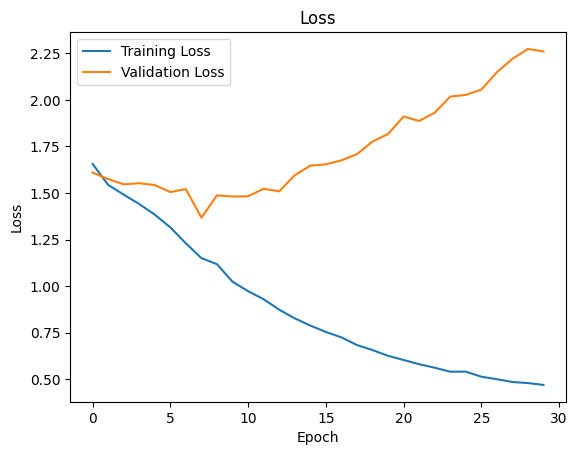

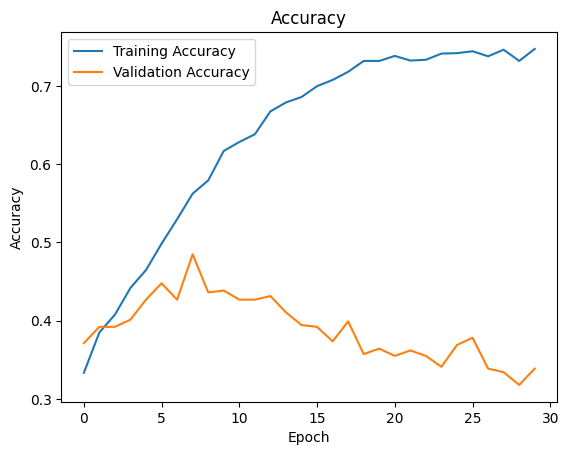

Testing accuracy: 0.46867749094963074


In [ ]:
# RNN model with same setting as lab6
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model = RNN(40, 6, len(vocabulary), 50, rnn='RNN').to(device)
train_rnn(rnn_model, train_loader, validate_loader, test_loader, lr=0.001, num_epoch=30)

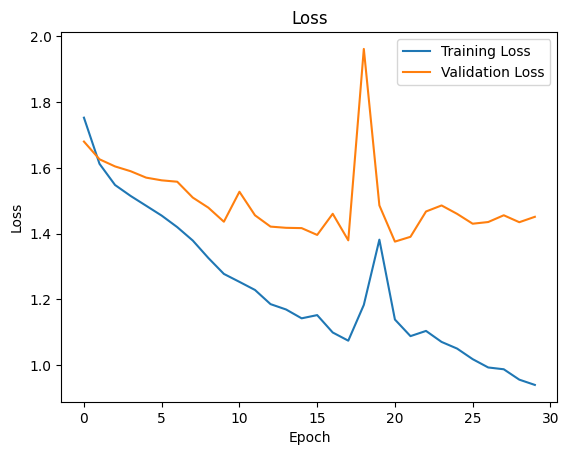

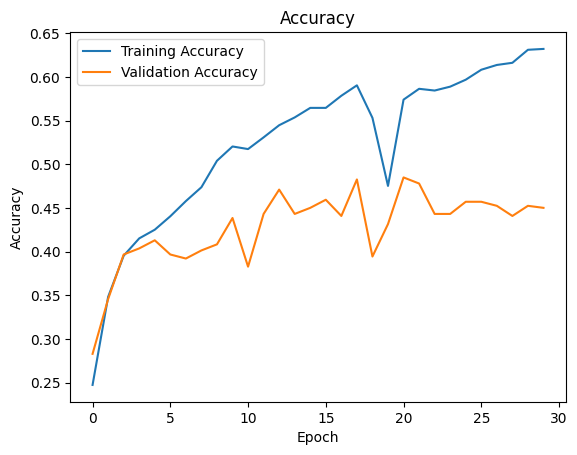

Testing accuracy: 0.443155437707901


In [ ]:
# RNN model with reduced learning rate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model = RNN(40, 6, len(vocabulary), 50, rnn='RNN').to(device)
train_rnn(rnn_model, train_loader, validate_loader, test_loader, lr=0.0005, num_epoch=30)

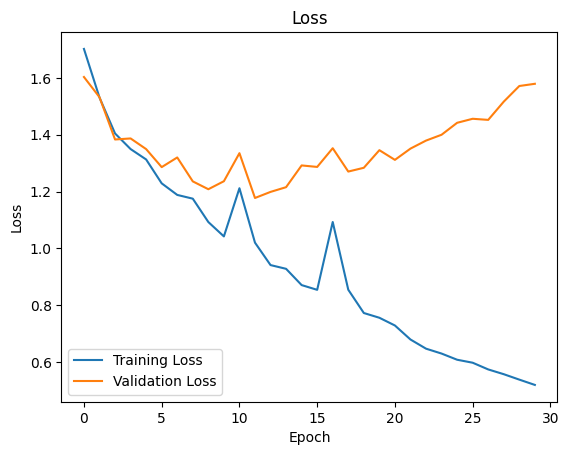

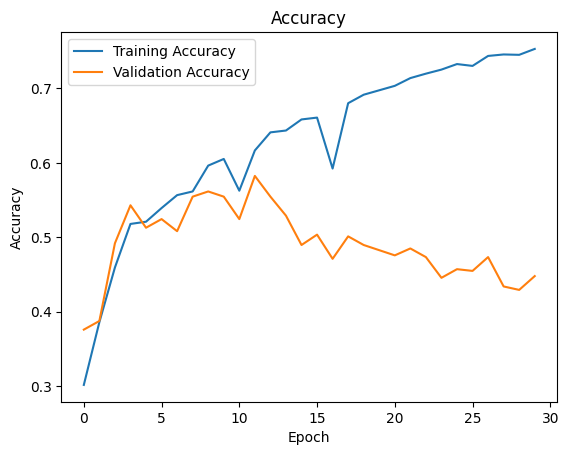

Testing accuracy: 0.5545243620872498


In [ ]:
# LSTM model:
lstm_model = RNN(40, 6, len(vocabulary), 50, rnn='LSTM').to(device)
train_rnn(lstm_model, train_loader, validate_loader, test_loader, lr=0.001, num_epoch=30)

**3.6) (25 points)** Now, let's finetune a sequence classification model based on BERT. Please install the Huggingface's Transformers library for this. Use the Pretrained 'bert-base-uncased' model for this problem. Please use the BERT tokenizer from the pretrained built for 'bert-base-uncased' model . Use the AdamW optimizer from the transformers library for optimization. Remember BERT uses Attention masks for input so you need to create a separate dataloader for BERT. Please keep in mind that BERT can handle maximum of 512 tokens.

**Please finetune the model so that it reaches at least 60% accuracy on the test set.**

The rest of your experimental setting should be the same as 3.5:

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [ ]:
!pip install transformers datasets evaluate

In [ ]:
# read saved files:
import pandas as pd
# Run this cell if you are working on Google Colab
from google.colab import drive
import os
drive.mount('/content/drive')

path = 'Colab Notebooks/'  # Change this to your drive directory
os.chdir(os.path.join('drive/MyDrive', path))
# drop data with no input:
test = pd.read_pickle('data/test.pkl').dropna(subset=['transcription']).reset_index(drop=True)
validation = pd.read_pickle('data/validation.pkl').dropna(subset=['transcription']).reset_index(drop=True)
train = pd.read_pickle('data/train.pkl').dropna(subset=['transcription']).reset_index(drop=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,description,medical_specialty,sample_name,transcription,keywords
0,"Cystoscopy, bladder biopsies, and fulguration...",2,Bladder Biopsies & Fulguration,preoperative diagnosis bladder lesions with hi...,"surgery, cystoscope, carcinoma, transitional c..."
1,Arthroscopic procedure of the knee.,2,Knee Arthroscopy - 1,procedure in detail after written consent was ...,"surgery, chondroplasty, knee, meniscus, patell..."
2,Sample female physical exam,1,Female Physical Exam - 1,female physical examination eye eyelids normal...,"general medicine, physical examination, abdomi..."
3,Stress test with Bruce protocol due to chest ...,3,Stress Test Bruce Protocol,protocol bruce pertinent medication none reaso...,NaN
4,Sample Radiology report of knee (growth arres...,4,Five views of the right knee.,exam five views of the right knee history pain...,"orthopedic, fractures dislocations or subluxat..."


In [ ]:
import re
def cleaned(df):
  pattern = re.compile('[^a-z]+') 
  df['transcription'] = df['transcription'].apply(lambda x:pattern.sub(' ', str(x).lower()))
  return df[['medical_specialty','transcription']]

In [ ]:
# create huggingface dataset:
from datasets import load_dataset, Dataset, DatasetDict
train_hf = Dataset.from_pandas(cleaned(train)) # cleaned() to rm useless cols
validate_hf = Dataset.from_pandas(cleaned(validation))
test_hf = Dataset.from_pandas(cleaned(test))
df_hf = DatasetDict({
    'train':train_hf,
    'validate':validate_hf,
    'test':test_hf
})
df_hf

DatasetDict({
    train: Dataset({
        features: ['medical_specialty', 'transcription'],
        num_rows: 2005
    })
    validate: Dataset({
        features: ['medical_specialty', 'transcription'],
        num_rows: 428
    })
    test: Dataset({
        features: ['medical_specialty', 'transcription'],
        num_rows: 429
    })
})

In [ ]:
# tokenization:
from transformers import AutoTokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
print(tokenizer)                   # check basic info. Eg. vocab size, max length
print(tokenizer.model_input_names) # input names

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)
['input_ids', 'token_type_ids', 'attention_mask']


In [ ]:
# demo of tokenization
output = tokenizer('Just checking tokenization')
print(output)
tokens = tokenizer.convert_ids_to_tokens(output['input_ids'])
print(tokens) # with masking
print(tokenizer.convert_tokens_to_string(tokens)) # original text

{'input_ids': [101, 2074, 9361, 19204, 3989, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}
['[CLS]', 'just', 'checking', 'token', '##ization', '[SEP]']
[CLS] just checking tokenization [SEP]


In [ ]:
# to tokenize the clean column:
df_hf = df_hf.rename_column('medical_specialty', 'labels') # to match the 'Trainer' function
tokenized_df = df_hf.map(lambda x:(tokenizer(x['transcription'], 
                                             padding='max_length', 
                                             truncation=True, 
                                             return_tensors='pt')), 
                         batched=True, remove_columns=['transcription'] )

train_dataset = tokenized_df["train"]
validate_dataset = tokenized_df["validate"]
test_dataset = tokenized_df["test"]

Map:   0%|          | 0/2005 [00:00<?, ? examples/s]

Map:   0%|          | 0/428 [00:00<?, ? examples/s]

Map:   0%|          | 0/429 [00:00<?, ? examples/s]

In [ ]:
train_dataset # Trainer will use labels as Y, input_ids as X

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2005
})

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
# my_config = AutoConfig.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
import evaluate
import numpy as np
metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
import torch
torch.cuda.is_available()
torch.cuda.empty_cache()

In [45]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="trainer", 
                                  evaluation_strategy="epoch",
                                  optim='adamw_torch',
                                  logging_strategy="epoch",
                                  fp16=True,
                                  # per_device_train_batch_size=16,
                                  # per_device_eval_batch_size=16,
                                  # torch_compile=True,    # improves training efficiency
                                  load_best_model_at_end=True,
                                  metric_for_best_model='accuracy',
                                  save_strategy="epoch",
                                  num_train_epochs=10
                                  )
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validate_dataset,
    compute_metrics=compute_metrics
)


In [ ]:
# print(torch.cuda.memory_summary(device=None, abbreviated=False) ) # check memory usage

In [46]:
training_output = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.518900,1.066668,0.567757
2,0.585200,1.104571,0.553738
3,0.567500,1.170988,0.525701
4,0.514300,1.304906,0.525701
5,0.484300,1.341633,0.530374
6,0.450100,1.524239,0.502336
7,0.405900,1.663852,0.476636
8,0.387900,1.847929,0.448598
9,0.357400,2.035806,0.471963
10,0.329700,2.118677,0.464953


In [65]:
# save model:
trainer.save_model("trained_bert_model")

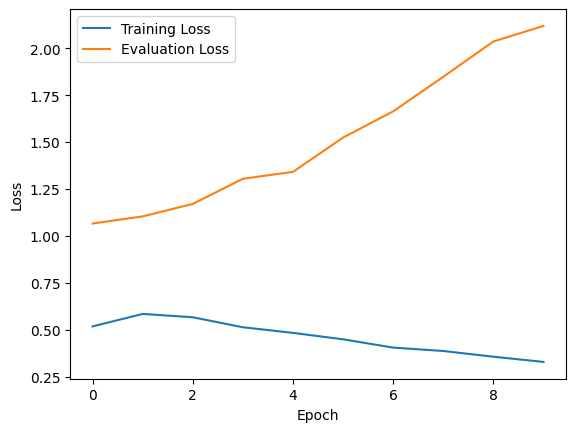

In [61]:
# plot the learning curve:
train_loss_values = []
eval_loss_values = []
import matplotlib.pyplot as plt
for item in trainer.state.log_history:
    train_loss = item.get('loss', None)
    eval_loss = item.get('eval_loss', None)
    if train_loss:
      train_loss_values.append(train_loss)
    if eval_loss:
      eval_loss_values.append(eval_loss)
plt.plot(train_loss_values, label="Training Loss")
plt.plot(eval_loss_values, label="Evaluation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [71]:
outputs = trainer.predict(test_dataset)[0]
test_acc = np.mean(np.argmax(outputs, axis=1) == test_dataset['labels'])
print(f"Testing set accuracy: {test_acc}")

Testing set accuracy: 0.5967365967365967


**3.7) (Bonus maximum 10 points)** List 5 examples on the test set that BERT misclassified. Describe reasons identified for misclassification.

**Ans.**

I first checked the confusion matrix & the accuracy in each class. Class 0 (' Cardiovascular / Pulmonary') & 1(' General Medicine') has the worst performance. Therefore I selected 5 examples from class 0 or 1. I think it's reasonable that "general medicine" will be a hard to classified class since the transcription should be relatively general. For the cardiovascular/pulmonary class, it's often misclassified as class 2 'surgery'. I think maybe it's because cardiovascular transcripts often contain surgery information.

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset['labels'], np.argmax(outputs, axis=1))
print(cm) 
for i in range(6):
    tp = cm[i, i]
    total = np.sum(cm[i, :])
    print(f"Accuracy for class {i}: {tp / total:.4f}, class size: {total}")

[[ 19   0  16   3   2   8]
 [  2  10   0   0   0  29]
 [ 17   0 114   1  34   0]
 [ 13   0   1  26   5   0]
 [  0   0   7   6  37   6]
 [  6  13   0   2   2  50]]
Accuracy for class 0: 0.3958, class size: 48
Accuracy for class 1: 0.2439, class size: 41
Accuracy for class 2: 0.6867, class size: 166
Accuracy for class 3: 0.5778, class size: 45
Accuracy for class 4: 0.6607, class size: 56
Accuracy for class 5: 0.6849, class size: 73


In [104]:
cnt = 0
print("Show 5 misclassified examples in testin set")
for (ids, bo) in zip(test_dataset["input_ids"], (incorrect and in01)):
    if cnt == 5:
        break
    if bo:
        cnt += 1
        tokens = tokenizer.convert_ids_to_tokens(ids)
        print(tokenizer.convert_tokens_to_string(tokens))

Show 5 misclassified examples in testin set
[CLS] preoperative diagnosis syncopal episodes with injury see electrophysiology consultation postoperative diagnoses normal electrophysiologic studies no inducible arrhythmia procainamide infusion negative for brugada syndrome procedures comprehensive electrophysiology studies with attempted arrhythmia induction iv procainamide infusion for brugada syndrome description of procedure the patient gave informed consent for comprehensive electrophysiologic studies she received small amounts of intravenous fentanyl and versed for conscious sedation then lidocaine local anesthesia was used three catheters were placed via the right femoral vein french catheters to the right ventricular apex and right atrial appendage and a french catheter to the his bundle later in the procedure the rv apical catheter was moved to rv outflow tract electrophysiological findings conduction intervals in sinus rhythm were normal sinus cycle length ms pa interval ms ah i